# **Importing the Dependencies**

In [1]:
from google.colab import files
import io
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score,recall_score, roc_curve,auc

# **Data Loading and Checking**

**Import Dataset**

In [2]:
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
diabetes = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

**Basic Checking**

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.shape

(768, 9)

In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


**Check for Missing Values**

In [8]:
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**Histogram of Independent Features**

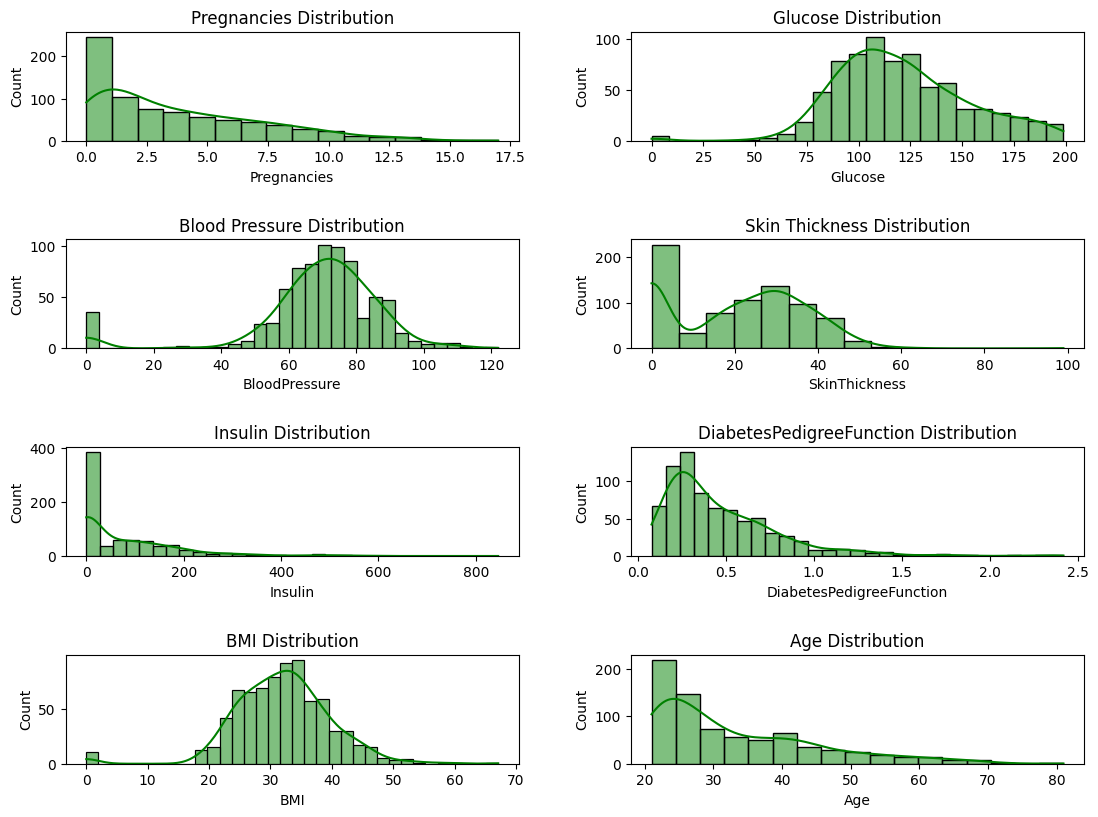

In [9]:
features = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','DiabetesPedigreeFunction', 'BMI', 'Age']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 9))
fig.tight_layout(pad=5.0)

sns.histplot(diabetes['Pregnancies'], kde=True, ax=axes[0, 0], color='green').set(title='Pregnancies Distribution')
sns.histplot(diabetes['Glucose'], kde=True, ax=axes[0, 1], color='green').set(title='Glucose Distribution')
sns.histplot(diabetes['BloodPressure'], kde=True, ax=axes[1, 0], color='green').set(title='Blood Pressure Distribution')
sns.histplot(diabetes['SkinThickness'], kde=True, ax=axes[1, 1], color='green').set(title='Skin Thickness Distribution')
sns.histplot(diabetes['Insulin'], kde=True, ax=axes[2, 0], color='green').set(title='Insulin Distribution')
sns.histplot(diabetes['DiabetesPedigreeFunction'], kde=True, ax=axes[2,1 ], color='green').set(title='DiabetesPedigreeFunction Distribution')
sns.histplot(diabetes['BMI'], kde=True, ax=axes[3, 0], color='green').set(title='BMI Distribution')
sns.histplot(diabetes['Age'], kde=True, ax=axes[3, 1], color='green').set(title='Age Distribution')

plt.show()

**Countplot for Dependent Feature**

<Axes: xlabel='Outcome', ylabel='count'>

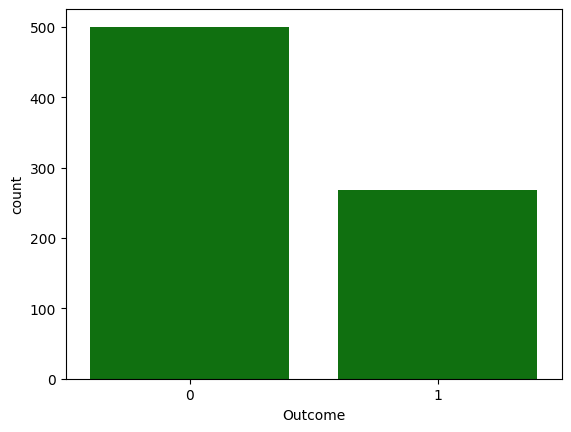

In [10]:
sns.countplot( data = diabetes,x = 'Outcome',color='green')

**Correlation Between Features**

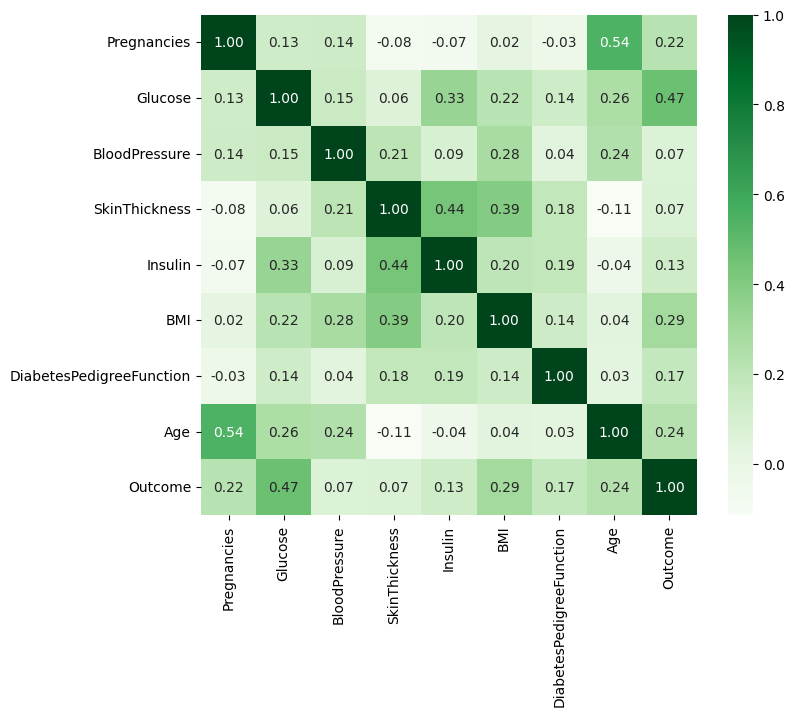

In [11]:
plt.figure(figsize=(8, 6.5))
sns.heatmap(diabetes.corr(), annot=True, fmt=".2f", cmap='Greens')
plt.show()

# **Preprocessing**

**Separation of Dependent and Independent Features**

In [12]:
x = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [13]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


**Train Test Split**

In [15]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


**Normalizing**

In [17]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [18]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled, columns=x_test.columns)

# **Machine Learning**

**ML with Imbalanced data**

***Logistic Regression***

*Hyparameter Tuning*

In [19]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}
logistic_regression = LogisticRegression(max_iter=1000)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
    grid_search.fit(x_train_scaled, y_train)

best_params = grid_search.best_params_

print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [20]:
logistic_regression=LogisticRegression(C= 10, penalty= 'l2', solver= 'lbfgs')

*Training Accuraacy*

In [21]:
logistic_regression.fit(x_train_scaled,y_train)
logistic_training_prediction=logistic_regression.predict(x_train_scaled)
print('Accuracy:', accuracy_score(y_train, logistic_training_prediction))

Accuracy: 0.7671009771986971


*Test Accuracy*

In [22]:
logistic_test_prediction=logistic_regression.predict(x_test_scaled)
print(classification_report(y_test, logistic_test_prediction))
print('Accuracy:', accuracy_score(y_test,logistic_test_prediction))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

Accuracy: 0.7597402597402597


*10-Fold Cross Validation*

In [23]:
cross_validation= cross_val_score(logistic_regression, x_train_scaled, y_train, cv=10)
print("Cross validation accuracy of LR model=",cross_validation)
print("\ncross validation mean accuracy of model=",format(cross_validation.mean(),".2f"))

Cross validation accuracy of LR model= [0.72580645 0.75806452 0.83870968 0.75806452 0.72131148 0.80327869
 0.73770492 0.70491803 0.78688525 0.78688525]

cross validation mean accuracy of model= 0.76


*Confusion Matrix*

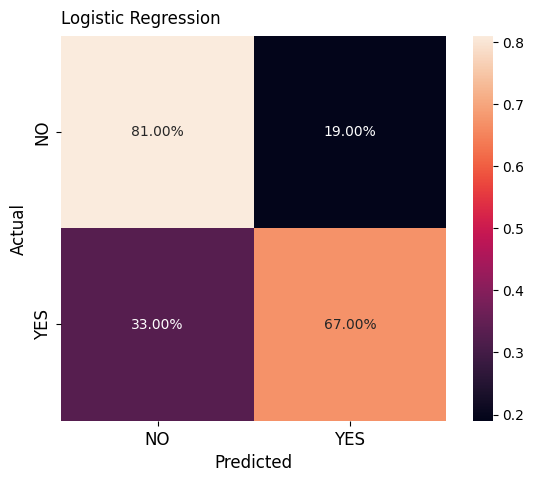

In [24]:
confusion_matrix= metrics.confusion_matrix(y_test, logistic_test_prediction)
plt.figure(figsize=(7,5))
normalized=np.round(confusion_matrix/np.sum(confusion_matrix,axis=1).reshape(-1,1),2)
plot=sns.heatmap(normalized, annot=True,fmt='.2%',
            annot_kws={'fontsize':10},
            xticklabels=['NO', 'YES'],
            yticklabels=['NO', 'YES'],
           square=True)
plot.set_xticklabels(plot.get_xticklabels(), fontsize=12)
plot.set_yticklabels(plot.get_yticklabels(), fontsize=12)

plt.title("Logistic Regression", fontsize=12,  y=1.01, loc='left')
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

*Sensitivity, Specificity, AUC*

In [25]:
sensitivity = recall_score(y_test, logistic_test_prediction)
specificity = confusion_matrix[0,0] / (confusion_matrix[0,0] + confusion_matrix[0,1])

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print('AUC:', roc_auc_score(y_test, logistic_test_prediction))

Sensitivity: 0.6727272727272727
Specificity: 0.8080808080808081
AUC: 0.7404040404040404


***Support Vector Machine***

*Hyperparameter Tuning*

In [26]:
  param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale', 'auto']
}
support_vector = SVC()
grid_search = GridSearchCV(support_vector, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

best_params = grid_search.best_params_

print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}


In [27]:
support_vector=SVC(C=10,gamma=0.1,kernel='linear')

*Training Accuracy*

In [28]:
support_vector.fit(x_train_scaled,y_train)
support_training_prediction=support_vector.predict(x_train_scaled)
print('Accuracy:', accuracy_score(y_train, support_training_prediction))

Accuracy: 0.7687296416938111


*Test Accuracy*

In [29]:
support_test_prediction=support_vector.predict(x_test_scaled)
print(classification_report(y_test, support_test_prediction))
print('Accuracy:', accuracy_score(y_test, support_test_prediction))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Accuracy: 0.7532467532467533


*10-Fold Cross Validation*

In [30]:
cross_validation= cross_val_score(support_vector, x_train_scaled,y_train, cv=10)
print("Cross validation accuracy of SVM model=",cross_validation)
print("\ncross validation mean accuracy of model=",format(cross_validation.mean(),".2f"))

Cross validation accuracy of SVM model= [0.74193548 0.75806452 0.83870968 0.75806452 0.72131148 0.81967213
 0.73770492 0.72131148 0.80327869 0.75409836]

cross validation mean accuracy of model= 0.77


*Confusion Matrix*

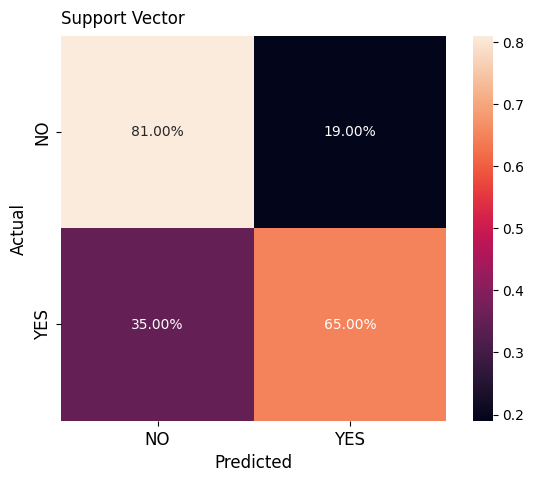

In [31]:
confusion_matrix= metrics.confusion_matrix(y_test, support_test_prediction)
plt.figure(figsize=(7,5))
normalized=np.round(confusion_matrix/np.sum(confusion_matrix,axis=1).reshape(-1,1),2)
plot=sns.heatmap(normalized, annot=True,fmt='.2%',
            annot_kws={'fontsize':10},
            xticklabels=['NO', 'YES'],
            yticklabels=['NO', 'YES'],
           square=True)
plot.set_xticklabels(plot.get_xticklabels(), fontsize=12)
plot.set_yticklabels(plot.get_yticklabels(), fontsize=12)

plt.title("Support Vector", fontsize=12,  y=1.01, loc='left')
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

*Sensitivity, Specificity, AUC*

In [32]:
sensitivity = recall_score(y_test, support_test_prediction)
specificity = confusion_matrix[0,0] / (confusion_matrix[0,0] + confusion_matrix[0,1])

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print('AUC:', roc_auc_score(y_test, support_test_prediction))

Sensitivity: 0.6545454545454545
Specificity: 0.8080808080808081
AUC: 0.7313131313131312


***Decision Tree***

*Hyperparameter Tuning *

In [33]:
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [0.12, 0.14, 0.16, 0.18],
}
decision_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(decision_tree, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

best_params = grid_search.best_params_

print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 0.12}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [34]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth= 4, min_samples_leaf= 0.12)

*Training Accuracy*

In [35]:
decision_tree.fit(x_train_scaled, y_train)
decision_training_prediction=decision_tree.predict(x_train_scaled)
print('Accuracy:', accuracy_score(y_train, decision_training_prediction))

Accuracy: 0.742671009771987


*Test Accuracy*

In [36]:
decision_test_prediction=decision_tree.predict(x_test_scaled)
print(classification_report(y_test, decision_test_prediction))
print('Accuracy:', accuracy_score(y_test, decision_test_prediction))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81        99
           1       0.76      0.29      0.42        55

    accuracy                           0.71       154
   macro avg       0.73      0.62      0.62       154
weighted avg       0.73      0.71      0.67       154

Accuracy: 0.7142857142857143


*10-Fold Cross Validation*

In [37]:
cross_validation= cross_val_score(decision_tree, x_train_scaled, y_train, cv=10)
print("Cross validation accuracy of DT model=",cross_validation)
print("\ncross validation mean accuracy of model=",format(cross_validation.mean(),".2f"))

Cross validation accuracy of DT model= [0.75806452 0.72580645 0.77419355 0.64516129 0.72131148 0.7704918
 0.73770492 0.70491803 0.7704918  0.73770492]

cross validation mean accuracy of model= 0.73


*Confusion Matrix*

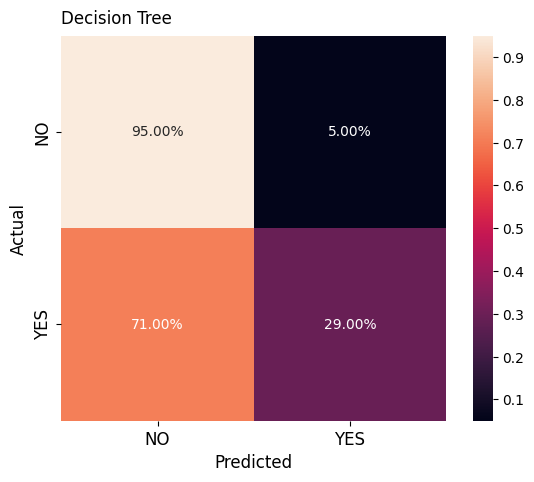

In [38]:
confusion_matrix= metrics.confusion_matrix(y_test, decision_test_prediction)
plt.figure(figsize=(7,5))
normalized=np.round(confusion_matrix/np.sum(confusion_matrix,axis=1).reshape(-1,1),2)
plot=sns.heatmap(normalized, annot=True,fmt='.2%',
            annot_kws={'fontsize':10},
            xticklabels=['NO', 'YES'],
            yticklabels=['NO', 'YES'],
           square=True)
plot.set_xticklabels(plot.get_xticklabels(), fontsize=12)
plot.set_yticklabels(plot.get_yticklabels(), fontsize=12)

plt.title("Decision Tree", fontsize=12,  y=1.01, loc='left')
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

*Sensitivity, Specificity, AUC*

In [39]:
sensitivity = recall_score(y_test, decision_test_prediction)
specificity = confusion_matrix[0,0] / (confusion_matrix[0,0] + confusion_matrix[0,1])

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print('AUC:', roc_auc_score(y_test, decision_test_prediction))

Sensitivity: 0.2909090909090909
Specificity: 0.9494949494949495
AUC: 0.6202020202020203


ROC Curve

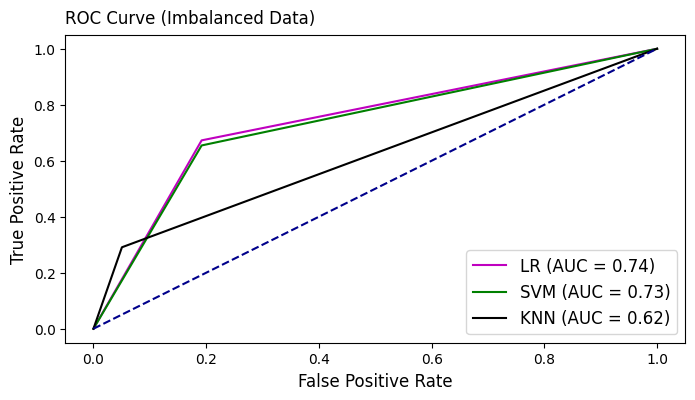

In [40]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, logistic_test_prediction)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, thresholds2 = roc_curve(y_test, support_test_prediction)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, thresholds3 = roc_curve(y_test, decision_test_prediction)
roc_auc3 = auc(fpr3, tpr3)

plt.figure(figsize=(8,4))
plt.plot(fpr1, tpr1, color='m', linestyle='solid',label='LR (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='g', linestyle='-',label='SVM (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='k', linestyle='-',label='KNN (AUC = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate',fontsize= 12)
plt.ylabel('True Positive Rate',fontsize= 12)
plt.title('ROC Curve (Imbalanced Data)', fontsize= 12, y=1.01,
          loc='left')
plt.legend(fontsize= 12)
plt.show()

**Balancing**

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_smote_train, y_smote_train = smote.fit_resample(x_train_scaled, y_train)

In [42]:
print(x_smote_train.shape)
print(y_smote_train.value_counts())

(802, 8)
Outcome
0    401
1    401
Name: count, dtype: int64


**ML with Balanced data**

***Logistic Regression***

*Hyperparameter Tuning*

In [43]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}
logistic_regression = LogisticRegression(max_iter=1000)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
    grid_search.fit(x_smote_train, y_smote_train)
best_params = grid_search.best_params_

print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [44]:
logistic_regression=LogisticRegression(C= 1, penalty= 'l2', solver= 'liblinear')

*Training Accuracy*

In [45]:
logistic_regression.fit(x_smote_train,y_smote_train)
logistic_training_prediction=logistic_regression.predict(x_smote_train)
print('Accuracy:', accuracy_score(y_smote_train, logistic_training_prediction))

Accuracy: 0.7655860349127181


*Test Accuracy*

In [46]:
logistic_test_prediction=logistic_regression.predict(x_test_scaled)
print(classification_report(y_test, logistic_test_prediction))
print('Accuracy:', accuracy_score(y_test,logistic_test_prediction))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76        99
           1       0.58      0.76      0.66        55

    accuracy                           0.71       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.71      0.72       154

Accuracy: 0.7142857142857143


*10-Fold Cross Validation*

In [47]:
cross_validation= cross_val_score(logistic_regression, x_smote_train,y_smote_train, cv=10)
print("Cross validation accuracy of LR model=",cross_validation)
print("\ncross validation mean accuracy of model=",format(cross_validation.mean(),".2f"))

Cross validation accuracy of LR model= [0.72839506 0.79012346 0.775      0.725      0.7875     0.7625
 0.825      0.7125     0.7875     0.775     ]

cross validation mean accuracy of model= 0.77


*Confusion Matrix*

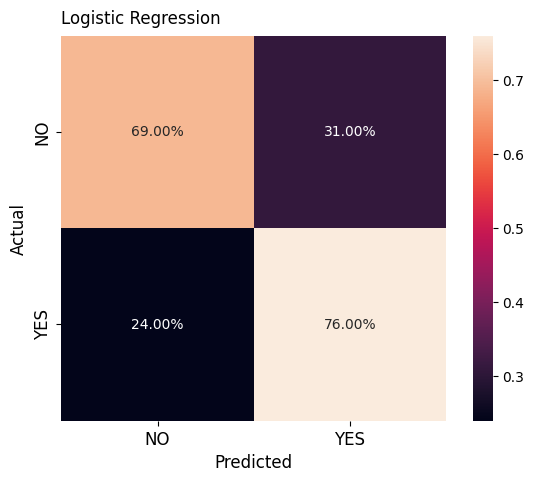

In [48]:
confusion_matrix= metrics.confusion_matrix(y_test, logistic_test_prediction)
plt.figure(figsize=(7,5))
normalized=np.round(confusion_matrix/np.sum(confusion_matrix,axis=1).reshape(-1,1),2)
plot=sns.heatmap(normalized, annot=True,fmt='.2%',
            annot_kws={'fontsize':10},
            xticklabels=['NO', 'YES'],
            yticklabels=['NO', 'YES'],
           square=True)
plot.set_xticklabels(plot.get_xticklabels(), fontsize=12)
plot.set_yticklabels(plot.get_yticklabels(), fontsize=12)

plt.title("Logistic Regression", fontsize=12,  y=1.01, loc='left')
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

*Sensitivity, Specificity, AUC*

In [49]:
sensitivity = recall_score(y_test, logistic_test_prediction)
specificity = confusion_matrix[0,0] / (confusion_matrix[0,0] + confusion_matrix[0,1])
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print('AUC:', roc_auc_score(y_test, logistic_test_prediction))

Sensitivity: 0.7636363636363637
Specificity: 0.6868686868686869
AUC: 0.7252525252525253


***Support Vector Machine***

*Hyperparameter Tuning*

In [50]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale', 'auto']
}
support_vector = SVC()
grid_search = GridSearchCV(support_vector, param_grid, cv=5)
grid_search.fit(x_smote_train, y_smote_train)

best_params = grid_search.best_params_

print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [51]:
support_vector=SVC(C=10,gamma=1,kernel='rbf')

*Training Accuracy*

In [52]:
support_vector.fit(x_smote_train,y_smote_train)
support_training_prediction=support_vector.predict(x_smote_train)
print('Accuracy:', accuracy_score(y_smote_train, support_training_prediction))

Accuracy: 0.816708229426434


*Test Accuracy*

In [53]:
support_test_prediction=support_vector.predict(x_test_scaled)
print(classification_report(y_test, support_test_prediction))
print('Accuracy:', accuracy_score(y_test, support_test_prediction))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74        99
           1       0.54      0.67      0.60        55

    accuracy                           0.68       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.70      0.68      0.69       154

Accuracy: 0.6818181818181818


*10-Fold Cross Validation*

In [54]:
cross_validation= cross_val_score(support_vector, x_smote_train, y_smote_train, cv=10)
print("Cross validation accuracy of SVM model=",cross_validation)
print("\ncross validation mean accuracy of model=",format(cross_validation.mean(),".2f"))

Cross validation accuracy of SVM model= [0.79012346 0.82716049 0.8        0.725      0.775      0.7625
 0.85       0.775      0.85       0.7875    ]

cross validation mean accuracy of model= 0.79


*Confusion Matrix*

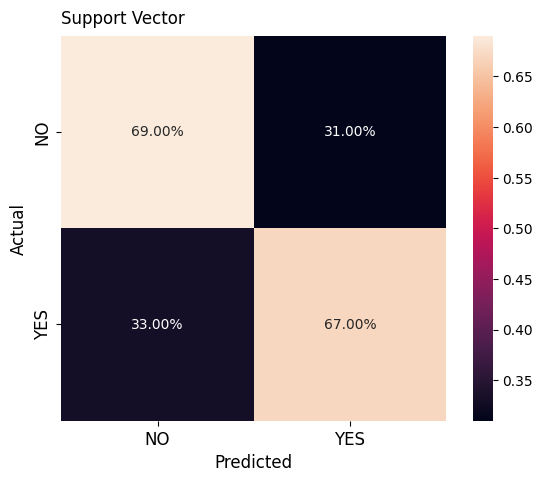

In [55]:
confusion_matrix= metrics.confusion_matrix(y_test, support_test_prediction)
plt.figure(figsize=(7,5))
normalized=np.round(confusion_matrix/np.sum(confusion_matrix,axis=1).reshape(-1,1),2)
plot=sns.heatmap(normalized, annot=True,fmt='.2%',
            annot_kws={'fontsize':10},
            xticklabels=['NO', 'YES'],
            yticklabels=['NO', 'YES'],
           square=True)
plot.set_xticklabels(plot.get_xticklabels(), fontsize=12)
plot.set_yticklabels(plot.get_yticklabels(), fontsize=12)

plt.title("Support Vector", fontsize=12,  y=1.01, loc='left')
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

*Sensitivity, Specificity, AUC*

In [56]:
sensitivity = recall_score(y_test, support_test_prediction)
specificity = confusion_matrix[0,0] / (confusion_matrix[0,0] + confusion_matrix[0,1])

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print('AUC:', roc_auc_score(y_test, support_test_prediction))

Sensitivity: 0.6727272727272727
Specificity: 0.6868686868686869
AUC: 0.6797979797979798


***Decision Tree***

Hyperparameter Tuning

In [57]:
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [0.12, 0.14, 0.16, 0.18],
}
decision_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(decision_tree, param_grid, cv=5)
grid_search.fit(x_smote_train, y_smote_train)

best_params = grid_search.best_params_

print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 0.12}


In [58]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth= 4, min_samples_leaf= 0.12)

Training Accuracy

In [59]:
decision_tree.fit(x_smote_train, y_smote_train)
decision_training_prediction=decision_tree.predict(x_smote_train)
print('Accuracy:', accuracy_score(y_smote_train, decision_training_prediction))

Accuracy: 0.7593516209476309


Test Accuracy

In [60]:
decision_test_prediction=decision_tree.predict(x_test_scaled)
print(classification_report(y_test, decision_test_prediction))
print('Accuracy:', accuracy_score(y_test, decision_test_prediction))

              precision    recall  f1-score   support

           0       0.88      0.69      0.77        99
           1       0.60      0.84      0.70        55

    accuracy                           0.74       154
   macro avg       0.74      0.76      0.73       154
weighted avg       0.78      0.74      0.75       154

Accuracy: 0.7402597402597403


10-Fold Cross Validation

In [61]:
cross_validation= cross_val_score(decision_tree, x_smote_train, y_smote_train, cv=10)
print("Cross validation accuracy of DT model=",cross_validation)
print("\ncross validation mean accuracy of model=",format(cross_validation.mean(),".2f"))

Cross validation accuracy of DT model= [0.7037037  0.71604938 0.7125     0.725      0.725      0.6875
 0.75       0.7        0.7375     0.7875    ]

cross validation mean accuracy of model= 0.72


*Confusion Matrix*

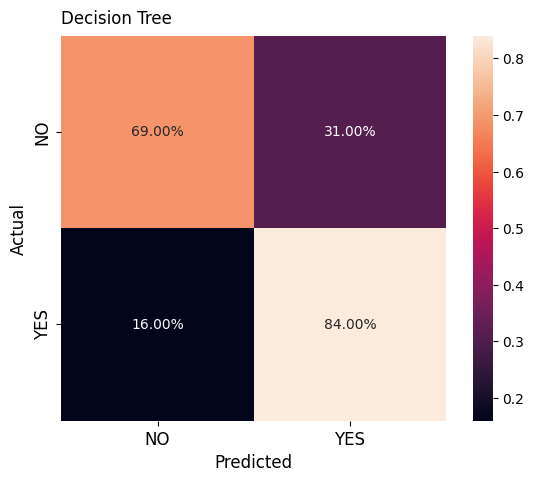

In [62]:
confusion_matrix= metrics.confusion_matrix(y_test, decision_test_prediction)
plt.figure(figsize=(7,5))
normalized=np.round(confusion_matrix/np.sum(confusion_matrix,axis=1).reshape(-1,1),2)
plot=sns.heatmap(normalized, annot=True,fmt='.2%',
            annot_kws={'fontsize':10},
            xticklabels=['NO', 'YES'],
            yticklabels=['NO', 'YES'],
           square=True)
plot.set_xticklabels(plot.get_xticklabels(), fontsize=12)
plot.set_yticklabels(plot.get_yticklabels(), fontsize=12)

plt.title("Decision Tree", fontsize=12,  y=1.01, loc='left')
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

Sensitivity, Specificity, AUC

In [63]:
sensitivity = recall_score(y_test, decision_test_prediction)
specificity = confusion_matrix[0,0] / (confusion_matrix[0,0] + confusion_matrix[0,1])

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print('AUC:', roc_auc_score(y_test, decision_test_prediction))

Sensitivity: 0.8363636363636363
Specificity: 0.6868686868686869
AUC: 0.7616161616161616


**ROC Curve**

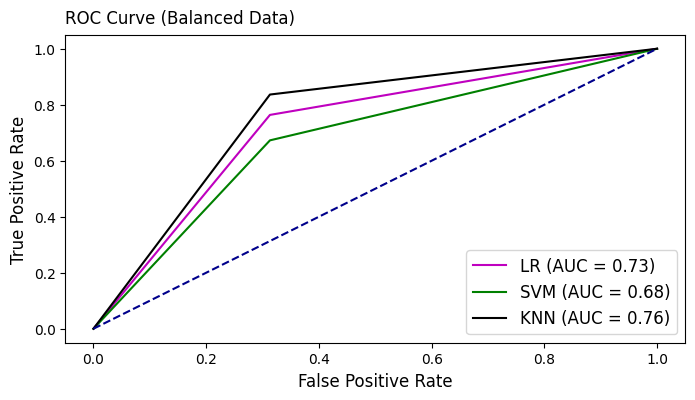

In [64]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, logistic_test_prediction)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, thresholds2 = roc_curve(y_test, support_test_prediction)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, thresholds3 = roc_curve(y_test, decision_test_prediction)
roc_auc3 = auc(fpr3, tpr3)

plt.figure(figsize=(8,4))
plt.plot(fpr1, tpr1, color='m', linestyle='solid',label='LR (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='g', linestyle='-',label='SVM (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='k', linestyle='-',label='KNN (AUC = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate',fontsize= 12)
plt.ylabel('True Positive Rate',fontsize= 12)
plt.title('ROC Curve (Balanced Data)', fontsize= 12, y=1.01,
          loc='left')
plt.legend(fontsize= 12)
plt.show()